# ✈️ Analisis dan Prediksi Kepuasan Penumpang Maskapai menggunakan Random Forest Classifier ✈️

Kelompok 11

- Fadhil Rausyanfikr | 23525046

- Muhammad Mukhlis | 23525045

- Yovanka Sandrina Maharaja | 18222094

## 📦 1. Import Libraries & Modules

Mengimpor pustaka penting untuk manipulasi data (Pandas, Numpy), visualisasi (Seaborn, Matplotlib), dan pemodelan (Scikit-Learn).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Visualisation Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120

## 📂 2. Load Dataset

Memuat dataset Airline Passenger Satisfaction ke dalam DataFrame.

In [26]:
# Read train and test files
df_train = pd.read_csv("https://drive.google.com/uc?id=1npGWo1guLxFKbdzFz6GNhlLoDIf4m-3v")
df_test = pd.read_csv("https://drive.google.com/uc?id=1pCMuq8AXt14Vb3Pcv3oS0FcPuB8lip7P")

# Combine both datasets
df = pd.concat([df_train, df_test], ignore_index=True)

## 🧐 3. Data Exploration (Overview & Structure)

Pemeriksaan awal dimensi data, tipe data, dan sampel baris.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [28]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [30]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 🧹 4. Data Cleaning & Validation

Mengecek dan menangani Missing Values (Imputasi) serta menghapus duplikasi atau kolom yang tidak relevan (seperti ID).

In [31]:
# a. Cleaning: Drop unnecessary columns
# 'Unnamed: 0', 'id' are identifiers/artifacts not useful for prediction
cols_to_drop = ['Unnamed: 0', 'id']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# b. Validation & Cleaning: Handle Missing Values
# Based on the df.info, 'Arrival Delay in Minutes' has missing values.
# We fill with median (robust to outliers).
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(df_clean['Arrival Delay in Minutes'].median())

## ⚙️ 5. Feature Engineering, Integration, & Encoding

Mengubah variabel kategorikal (Gender, Type of Travel) menjadi numerik (Label/One-Hot Encoding) agar bisa diproses oleh model.

In [32]:
# a. Feature Engineering & Integration
# Create 'Total Delay'
df_clean['Total Delay'] = df_clean['Departure Delay in Minutes'] + df_clean['Arrival Delay in Minutes']

# Create 'Delay Category' (No Delay, Short Delay, Long Delay)
def categorize_delay(x):
    if x == 0: return 'No Delay'
    elif x <= 30: return 'Short Delay'
    else: return 'Long Delay'
df_clean['Delay Category'] = df_clean['Total Delay'].apply(categorize_delay)

# b. Encoding
# Label Encoding for Target ('satisfaction')
satisfaction_map = {'neutral or dissatisfied': 0, 'satisfied': 1}
df_clean['satisfaction_encoded'] = df_clean['satisfaction'].map(satisfaction_map)

# Ordinal Encoding for 'Class' (Order matters)
class_map = {'Eco': 1, 'Eco Plus': 2, 'Business': 3}
df_clean['Class_encoded'] = df_clean['Class'].map(class_map)

# One-Hot Encoding for nominal variables (Gender, Customer Type, Type of Travel)
# We use get_dummies just to show how it's done, but keep the original columns for EDA readability
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Customer Type', 'Type of Travel', 'Delay Category'], drop_first=True)

# Drop original columns that are no longer needed since numeric versions exist
cols_to_drop = ['satisfaction', 'Class'] 
df_final = df_encoded.drop(columns=[c for c in cols_to_drop if c in df_encoded.columns])

In [33]:
df_final.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay,satisfaction_encoded,Class_encoded,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Delay Category_No Delay,Delay Category_Short Delay
0,13,460,3,4,3,1,5,3,5,5,...,25,18.0,43.0,0,2,True,False,True,False,False
1,25,235,3,2,3,3,1,3,1,1,...,1,6.0,7.0,0,3,True,True,False,False,True
2,26,1142,2,2,2,2,5,5,5,5,...,0,0.0,0.0,1,3,False,False,False,True,False
3,25,562,2,5,5,5,2,2,2,2,...,11,9.0,20.0,0,3,False,False,False,False,True
4,61,214,3,3,3,3,4,5,5,3,...,0,0.0,0.0,1,3,True,False,False,True,False


## 📊 6. Exploratory Data Analysis (EDA)

Visualisasi mendalam untuk memahami distribusi data dan pola kepuasan penumpang.

In [34]:
print("--- SHAPE ---")
print(df_clean.shape)
print("\n--- INFO ---")
print(df_clean.info())
print("\n--- DESCRIBE (Numerical) ---")
print(df_clean.describe())

--- SHAPE ---
(129880, 27)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11

### a. Analisis Keseimbangan Kelas Target

Target Class Distribution (satisfaction):
satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

Distribution Percentage:
satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64


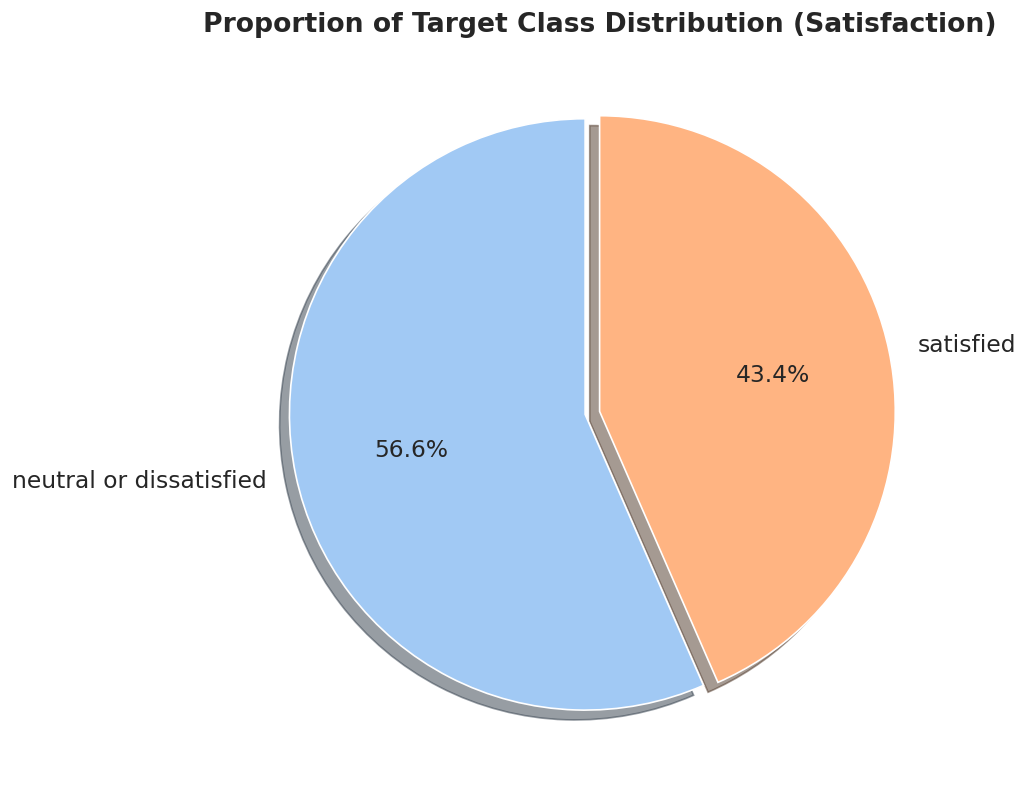

In [35]:
# --- 1. Calculate Counts and Percentages (Retained) ---
target_counts = df_clean['satisfaction'].value_counts()
target_percentages = df_clean['satisfaction'].value_counts(normalize=True) * 100

print("Target Class Distribution (satisfaction):")
print(target_counts)
print("\nDistribution Percentage:")
print(target_percentages)

# --- 2. Pie Chart Visualization ---
plt.figure(figsize=(8, 8))

# Set pastel colors using seaborn palette
colors = sns.color_palette('pastel')[0:2]

# Create Pie Chart
# explode=(0.05, 0): gives a slight separation to the first slice to make it stand out
plt.pie(target_counts, 
        labels=target_counts.index, 
        autopct='%1.1f%%',      # Display percentage with 1 decimal place
        startangle=90,          # Rotate chart to start from the 12 o'clock position
        colors=colors,          # Pastel colors
        explode=(0.05, 0),      # Explosion/separation effect
        shadow=True,            # Add 3D shadow effect
        textprops={'fontsize': 14}) # Text font size

plt.title('Proportion of Target Class Distribution (Satisfaction)', fontsize=16, fontweight='bold')
plt.show()

### b. Distribusi Kepuasan berdasarkan Kelas dan Tipe Perjalanan

<Figure size 1200x720 with 0 Axes>

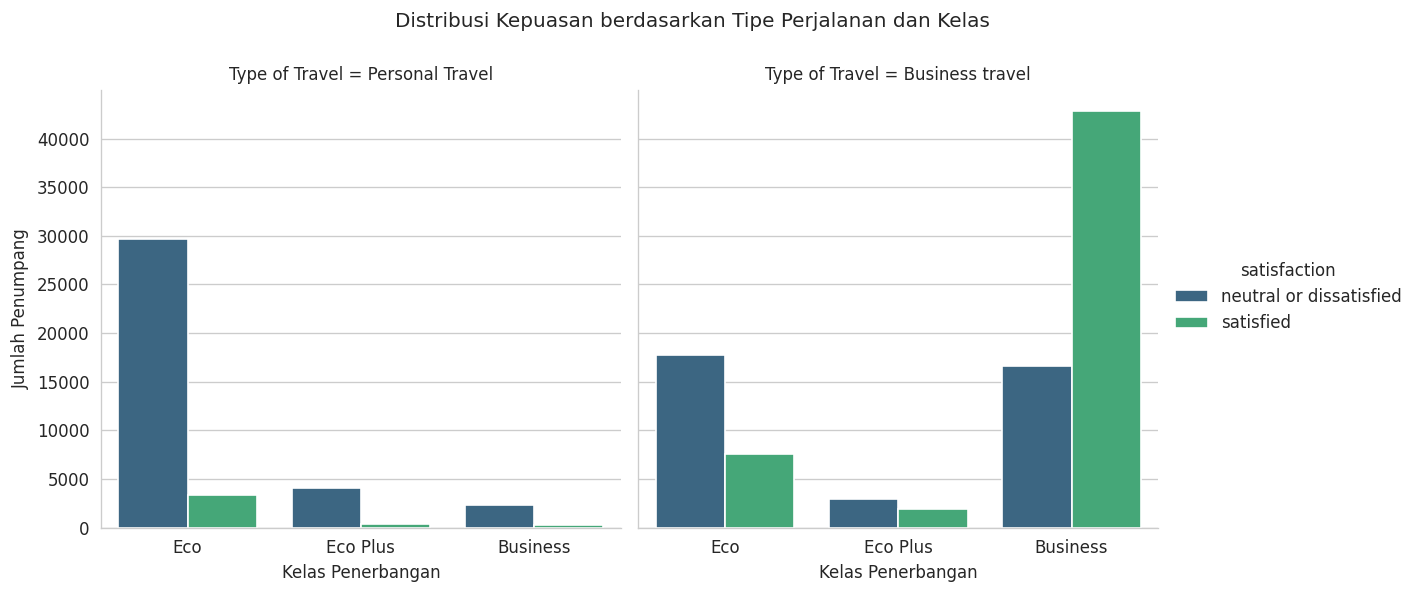

In [36]:
plt.figure(figsize=(10, 6))

g = sns.catplot(
    data=df_clean, 
    x='Class', 
    hue='satisfaction', 
    col='Type of Travel', 
    kind='count', 
    palette='viridis',
    height=5, 
    aspect=1,
    order=['Eco', 'Eco Plus', 'Business'] 
)

g.set_axis_labels("Kelas Penerbangan", "Jumlah Penumpang")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribusi Kepuasan berdasarkan Tipe Perjalanan dan Kelas')
plt.show()

### c.  "The Service Gap" Boxplot Layanan Kunci vs. Kepuasan

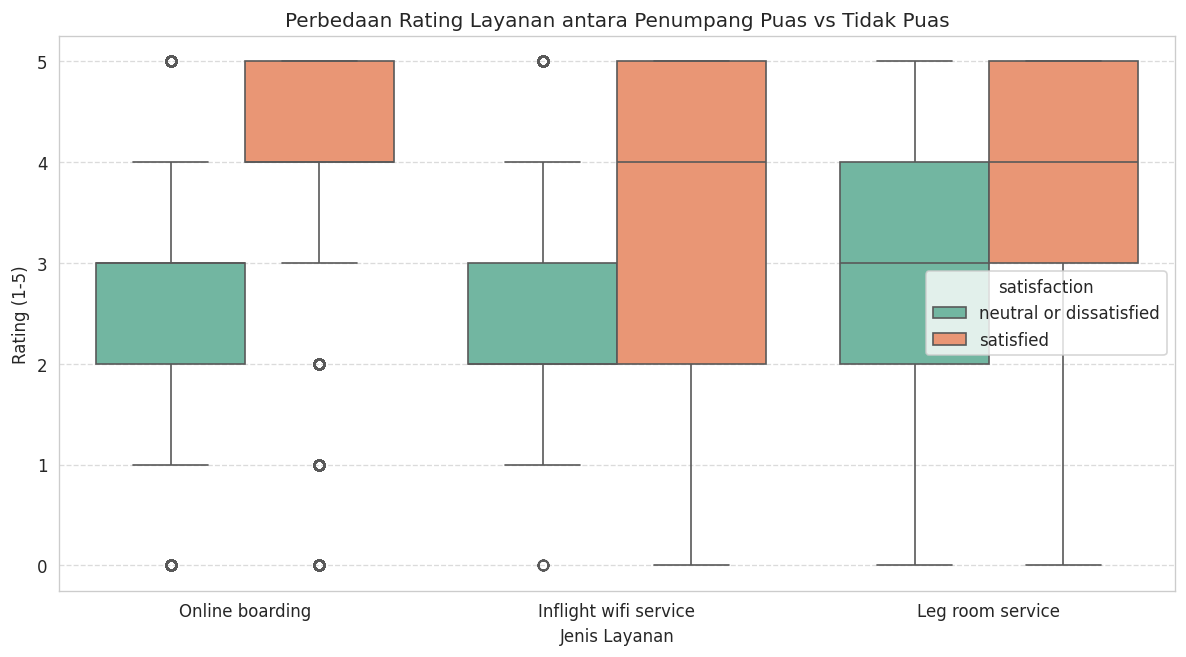

In [37]:
# Choose feature for analysis
service_cols = ['Online boarding', 'Inflight wifi service', 'Leg room service']

# Melt the dataframe to allow simultaneous plotting
df_melted = df_clean.melt(id_vars='satisfaction', value_vars=service_cols, 
                          var_name='Jenis Layanan', value_name='Rating (1-5)')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Jenis Layanan', y='Rating (1-5)', hue='satisfaction', palette='Set2')

plt.title('Perbedaan Rating Layanan antara Penumpang Puas vs Tidak Puas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### d. Correlation Heatmap

Melihat hubungan korelasi antar variabel numerik.

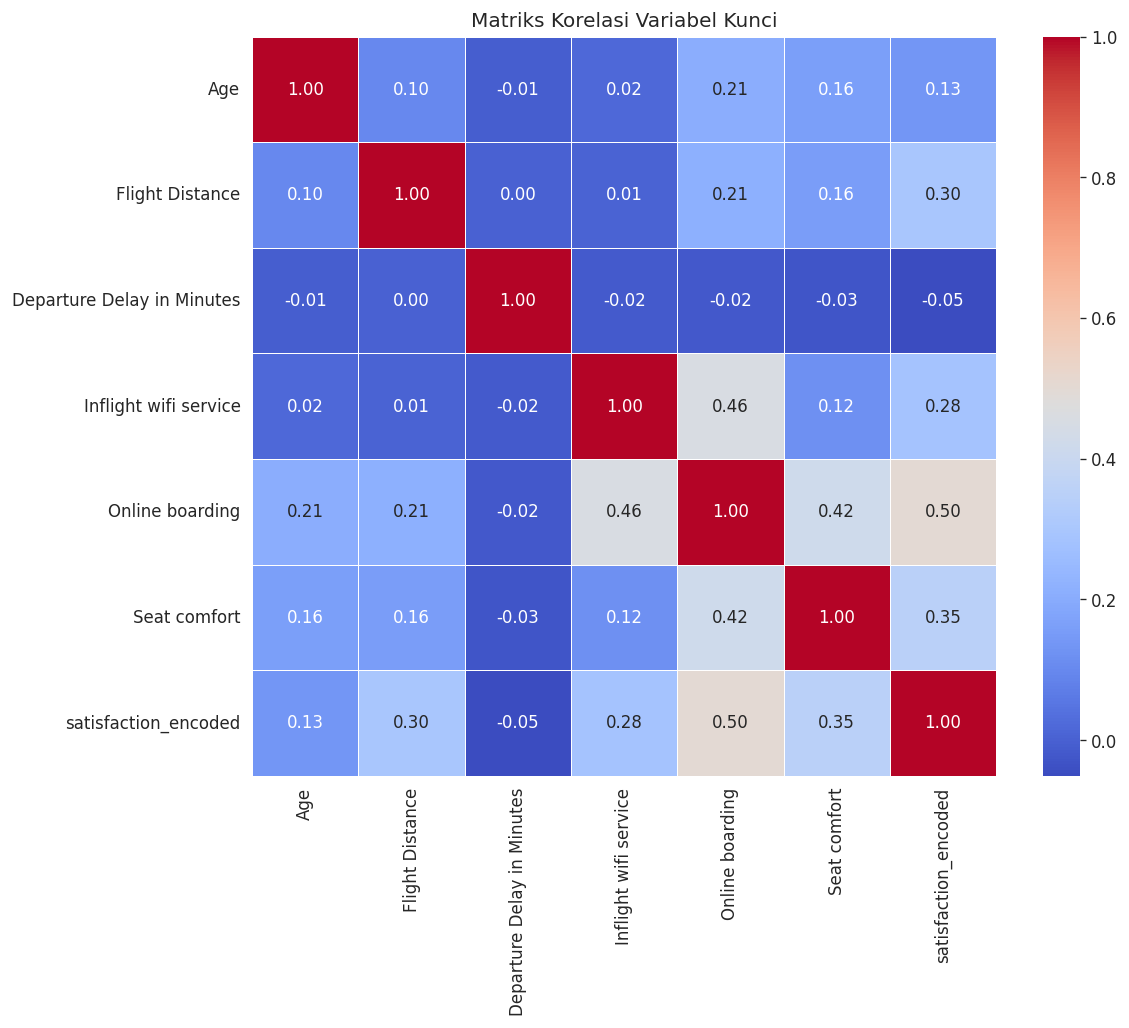

In [38]:
#Select numeric columns, key service ratings, and target encoded features
cols_to_corr = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 
                'Inflight wifi service', 'Online boarding', 'Seat comfort', 
                'satisfaction_encoded']

plt.figure(figsize=(10, 8))
correlation = df_clean[cols_to_corr].corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Kunci')
plt.show()

## ✂️ 7. Data Splitting

Membagi data menjadi Training Set (80%) untuk melatih model dan Testing Set (20%) untuk validasi.

In [39]:
# Define X (Features) and y (Target)
X = df_final.drop(columns=['satisfaction_encoded'])
y = df_final['satisfaction_encoded']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}")
print(f"Testing Data : {X_test.shape}")

Training Data: (103904, 25)
Testing Data : (25976, 25)


## 🤖 8. Model Training + Evaluation

Membangun dan melatih model pada data training. Setelah itu, mengukur performa model menggunakan metrik Akurasi, Confusion Matrix, dan Classification Report.

### Random Forest

In [40]:
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
print("Training model...")
rf_model.fit(X_train, y_train)
print("Model Training Complete!")

Training model...
Model Training Complete!


Model Accuracy: 96.21%

--- Detailed Classification Report ---
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.98      0.97     14622
           Satisfied       0.97      0.94      0.96     11354

            accuracy                           0.96     25976
           macro avg       0.96      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



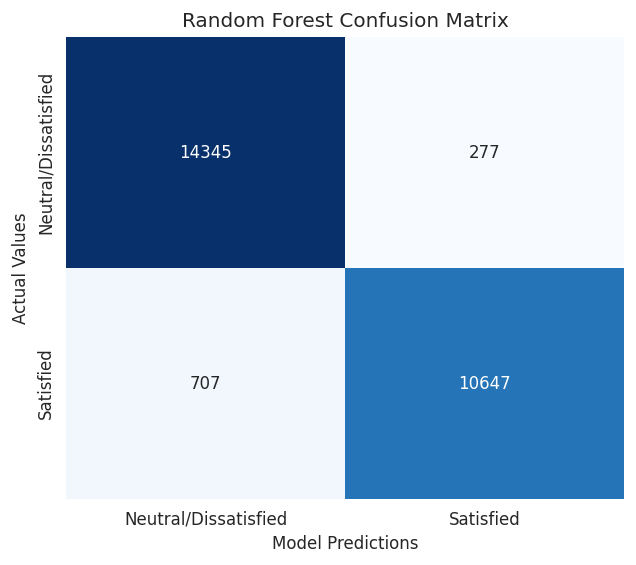

In [41]:
# Predictions
y_pred = rf_model.predict(X_test)

# a. Accuracy
rf_acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {rf_acc * 100:.2f}%\n")

# b. Classification Report
print("--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# c. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.ylabel('Actual Values')
plt.xlabel('Model Predictions')
plt.title('Random Forest Confusion Matrix')
plt.show()

### LightGBM

In [42]:
# Initialize LightGBM Model
lgbm_model = LGBMClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training model...")
lgbm_model.fit(X_train, y_train)
print("Model Training Complete!")

Training model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45074, number of negative: 58830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433804 -> initscore=-0.266346
[LightGBM] [Info] Start training from score -0.266346
Model Training Complete!


Model Accuracy: 96.39%

--- Detailed Classification Report ---
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.98      0.97     14622
           Satisfied       0.98      0.94      0.96     11354

            accuracy                           0.96     25976
           macro avg       0.97      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



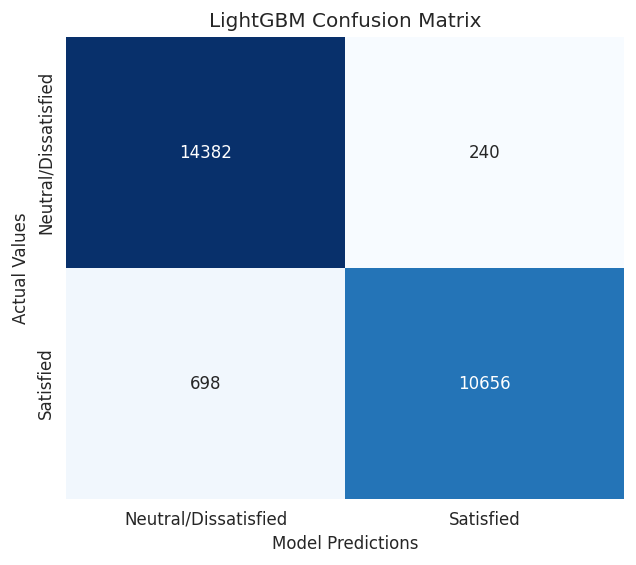

In [43]:
# Predictions
y_pred = lgbm_model.predict(X_test)

# a. Accuracy
lgbm_acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {lgbm_acc * 100:.2f}%\n")

# b. Classification Report
print("--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# c. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.ylabel('Actual Values')
plt.xlabel('Model Predictions')
plt.title('LightGBM Confusion Matrix')
plt.show()

### XGBoost

In [44]:
# Initialize XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training model...")
xgb_model.fit(X_train, y_train)
print("Model Training Complete!")

Training model...
Model Training Complete!


Model Accuracy: 96.36%

--- Detailed Classification Report ---
                      precision    recall  f1-score   support

Neutral/Dissatisfied       0.95      0.98      0.97     14622
           Satisfied       0.98      0.94      0.96     11354

            accuracy                           0.96     25976
           macro avg       0.97      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



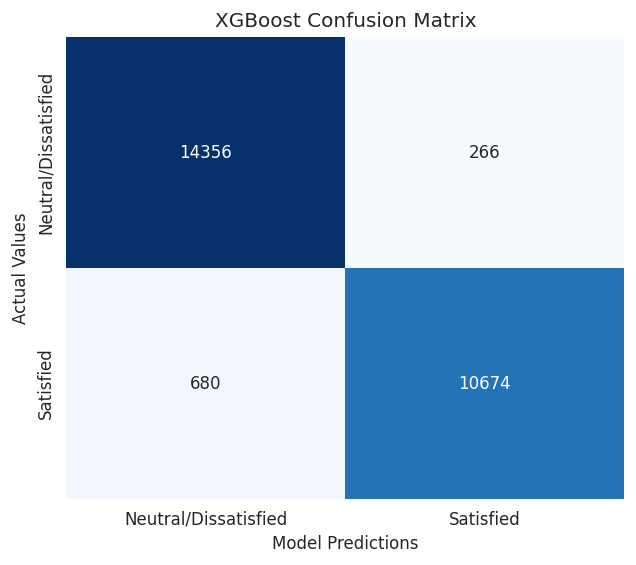

In [45]:
# Predictions
y_pred = xgb_model.predict(X_test)

# a. Accuracy
xgb_acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {xgb_acc * 100:.2f}%\n")

# b. Classification Report
print("--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Neutral/Dissatisfied', 'Satisfied']))

# c. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.ylabel('Actual Values')
plt.xlabel('Model Predictions')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Comparison

In [46]:
auc_scores = [rf_acc, lgbm_acc, xgb_acc]
model_scores = pd.DataFrame(auc_scores, index=['Random Forest','LightGBM','XGBoost'], columns=['Accuracy'])
model_scores.head()

,Accuracy
Random Forest,0.962119
LightGBM,0.963890
XGBoost,0.963582


## 🌟 9. Feature Importance Analysis

Mengidentifikasi fitur/faktor layanan mana yang paling berpengaruh terhadap kepuasan penumpang.

/tmp/ipykernel_48952/197531061.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')


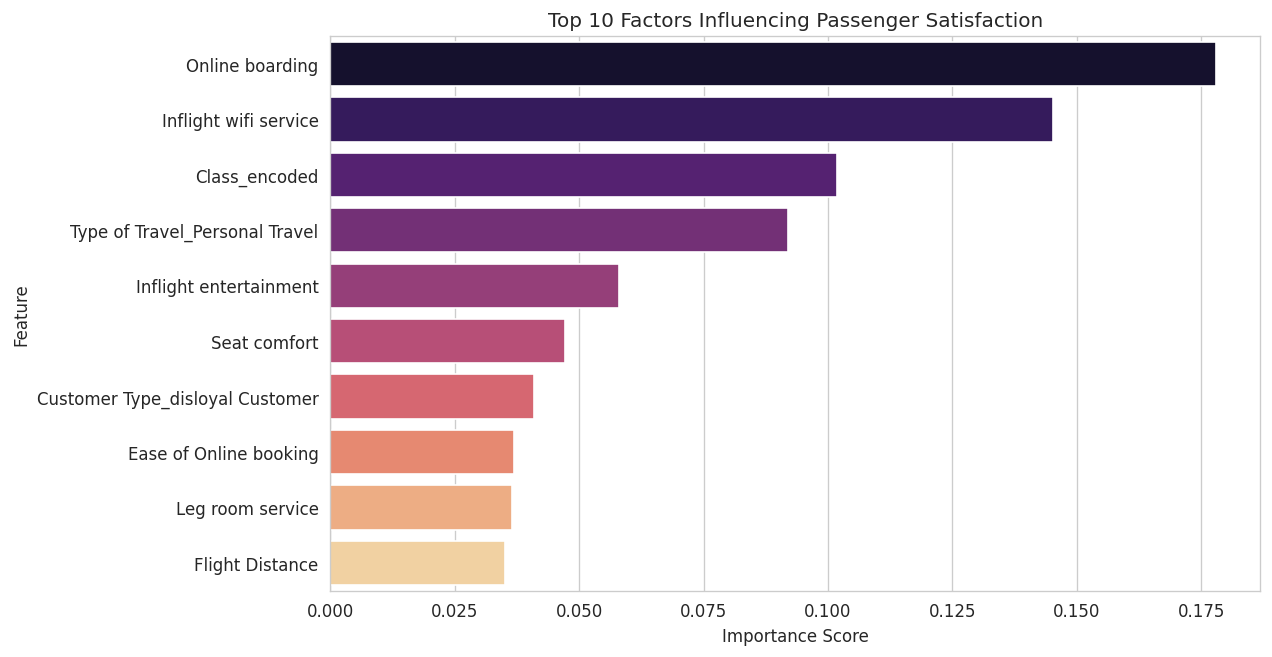

The #1 factor most influencing passenger satisfaction is Online boarding.


In [47]:
# Extract Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='magma')
plt.title('Top 10 Factors Influencing Passenger Satisfaction')
plt.xlabel('Importance Score')
plt.show()

top_feature = feature_df.iloc[0]['Feature']
print(f"The #1 factor most influencing passenger satisfaction is {top_feature}.")

## 💾 10. Conclusion & Saving Model

Menyimpan model yang sudah dilatih (pickle untuk penggunaan masa depan.

In [48]:
import pickle

# --- a. Brief Conclusion ---
print(f"Random Forest, LightGBM, and XGBoost model successfully built")
print(f"LightGBM has the best Accuracy with: {lgbm_acc * 100:.2f}%")
print("This model can now predict if a passenger will be SATISFIED or DISSATISFIED")
print("based on their flight data and service ratings.")

# --- b. Saving the Model ---
filename = 'airline_satisfaction_rf_model.pkl'

# Open file in 'wb' (write binary) mode
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"\nModel successfully saved! Filename: '{filename}'")

Random Forest, LightGBM, and XGBoost model successfully built
LightGBM has the best Accuracy with: 96.39%
This model can now predict if a passenger will be SATISFIED or DISSATISFIED
based on their flight data and service ratings.

Model successfully saved! Filename: 'airline_satisfaction_rf_model.pkl'
